In [1]:
# import pandas as pd
# import numpy as np

# # for view all of datas
# pd.set_option('display.max_rows', 1500)
# pd.set_option('display.max_columns', 150)

# df_raw = pd.read_csv('./data/Orders.csv')
# df_raw2 = pd.read_csv('./data/Returns.csv')

In [2]:
# import datetime as dt
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [3]:
# df = df_raw.copy()

In [4]:
# df.head()

In [5]:
# # check categorical value / numeric value
# #df_raw.nunique()[map(lambda x : x<50, df_raw.nunique())]
# # 
# pd.DataFrame({'unique count':df_raw.nunique(),'null count':df_raw.isnull().sum()})

In [6]:
# #1
# df.Profit = df.Profit.str.replace('$', '').str.replace(',', '').astype('float')
# df.Sales = df.Sales.str.replace('$', '').str.replace(',', '').astype('float')

In [7]:
# #2.1 Is there any seasonal trend of inventory in the company?
# # df['Order.Date'] = list(map(lambda x:dt.datetime.strptime(x, '%m/%d/%y'), df['Order.Date']))
# df['Order.Date'] = pd.to_datetime(df['Order.Date'])

In [8]:
# df['Order.Date.Q'] = pd.PeriodIndex(df['Order.Date'], freq='Q')

In [9]:
# df_season = df.groupby(['Order.ID', 'Order.Date.Q', 'Category']).agg({'Quantity':'min'})

In [10]:
#3.1 How much profit did we lose due to returns each year?
# df1 = df_raw2.copy()

In [11]:
# df1.head()

In [12]:
# df['Order.ID'].nunique()

In [13]:
# df1.rename(columns={'Order ID':'Order.ID'}, inplace=True)

In [14]:
# df3 = pd.merge(df, df1, on = ['Order.ID', 'Region'])

In [15]:
# df3['Returned'].fillna('')
# df3[df3.Returned != 'Yes']

## Part I: Preprocessing and EDA

### Problem 1: Dataset Import & Cleaning


In [16]:
import pandas as pd
%matplotlib inline

orders = pd.read_csv('data/Orders.csv')
pd.options.display.max_columns = 30

In [17]:
orders.sample(5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
1735,14653,ES-2013-ND18370139-41318,2/13/13,2/18/13,Second Class,ND-18370139,Natalie DeCherney,Consumer,NaN,London,England,United Kingdom,Northern Europe,Europe,TEC-CO-6006,Technology,Copiers,"Sharp Personal Copier, Digital",$861.41,8,0.1,$382.85,147.450,High
46109,34805,CA-2012-SC20020140-41079,6/19/12,6/23/12,Standard Class,SC-200201402,Sam Craven,Consumer,75023.0,Plano,Texas,United States,Central US,USCA,OFF-PA-6559,Office Supplies,Paper,Xerox 2,$15.55,3,0.2,$5.44,1.650,High
3266,9852,US-2015-CS1249082-42238,8/22/15,8/24/15,Second Class,CS-1249082,Cindy Schnelling,Corporate,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,FUR-BO-5967,Furniture,Bookcases,"Sauder Library with Doors, Mobile",$624.24,3,0.2,$31.20,93.365,Critical
43136,36519,CA-2015-PP18955140-42143,5/19/15,5/23/15,Second Class,PP-189551402,Paul Prost,Home Office,65807.0,Springfield,Missouri,United States,Central US,USCA,TEC-PH-5255,Technology,Phones,Motorola HK250 Universal Bluetooth Headset,$114.95,5,0.0,$2.30,13.850,Medium
49861,32284,CA-2013-TS21340140-41343,3/10/13,3/10/13,Same Day,TS-213401402,Toby Swindell,Consumer,77041.0,Houston,Texas,United States,Central US,USCA,OFF-BI-2935,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,$1.11,2,0.8,-$1.89,1.060,High


In [18]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [19]:
# convert Profit and Sales columns to numeric type. 
import re
orders.Profit = orders.Profit.map(lambda x: float(re.sub('[$,]', '', x)))
orders.Sales = orders.Sales.map(lambda x: float(re.sub('[,$]', '', x)))

### Problem 2: Inventory Management
**Is there any seasonal sales trend in the company?**

In [20]:
# Convert and mutate date columns
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])
orders['Order.Month'] = orders['Order.Date'].dt.month
orders['Order.Day'] = orders['Order.Date'].dt.dayofyear

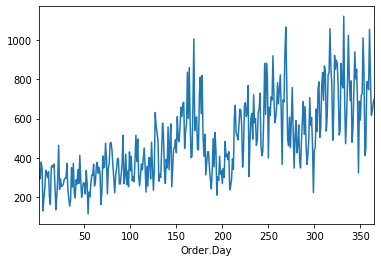

In [21]:
orders.groupby('Order.Day')['Quantity'].sum().plot()

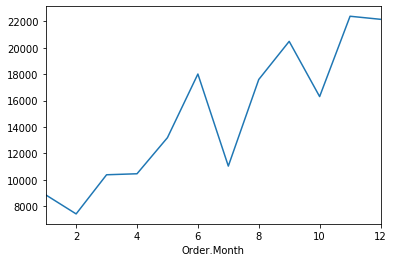

In [22]:
orders.groupby('Order.Month')['Quantity'].sum().plot()

**Is the seasonal trend the same for different categories?**

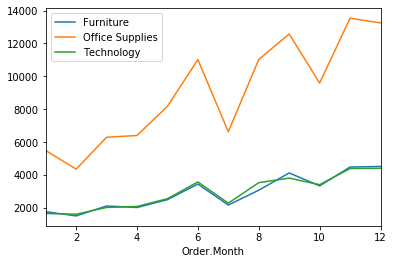

In [23]:
for index, group in orders.groupby(['Category']):
    group_agg = group.groupby(['Order.Month'])['Quantity'].sum()
    group_agg.plot(y='Quantity', label=index, legend=True)

**Looks like there is a peak during the holiday seasons and big drops in July and October.**

### Problem 3: Why did customers make returns?
**How much profit did we lose due to returns each year?**

In [24]:
returns = pd.read_csv('data/Returns.csv')

In [25]:
# Region is contained in both dataframes
returns = returns.drop('Region', axis=1).merge(orders, how='left', left_on='Order ID', right_on='Order.ID')

In [26]:
returns['Order.Year'] = returns['Order.Date'].dt.year

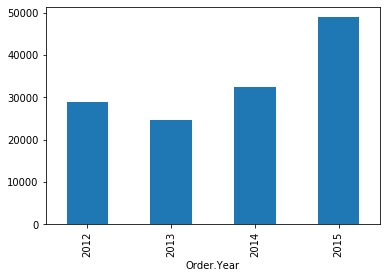

In [27]:
# Profit could be negative so we need to sum the absolute values
returns.groupby('Order.Year')['Profit'].apply(lambda c: c.abs().sum()).plot.bar()

**How many customers returned more than once? 5 times?**

In [28]:
len(returns.groupby('Customer.ID').filter(lambda x: len(x) > 1)['Customer.ID'].unique())

547

In [29]:
len(returns.groupby('Customer.ID').filter(lambda x: len(x) > 5)['Customer.ID'].unique())

46

**Which regions are more likely to return orders?**

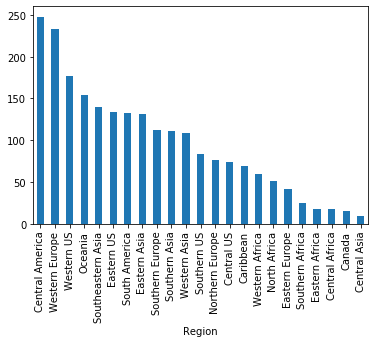

In [30]:
returns.groupby('Region').size().sort_values(ascending=False).plot.bar()

**Which categories (sub-categories) of products are more likely to be returned**

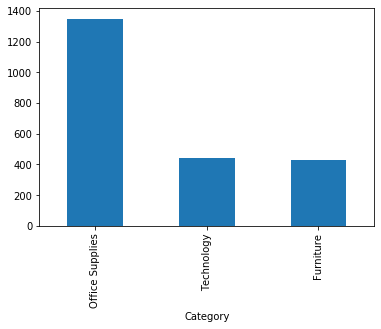

In [31]:
returns.groupby('Category').size().sort_values(ascending=False).plot.bar()

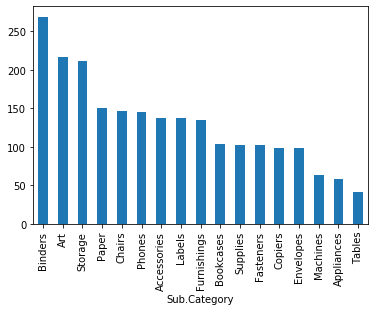

In [32]:
returns.groupby('Sub.Category').size().sort_values(ascending=False).plot.bar()

## Part II: Machine Learning and Business Use-Case

Now your manager has a basic idea of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable

#### Step 2: Time to ship feature

#### Step 3: Number of return times

### Problem 5: Fitting Models

#### Step 1: Select the columns to use

#### Step 2: Train/test split

#### Step 3: Fit a logistic regression model

#### Step 4: Evaluate your logistic regression model

#### Step 5: Fit a random forest model

#### Step 6: Evaluate your random forest model

### Problem 6:
Is there anything wrong with the feature engineering process? How should we fix it?